In [2]:
import pandas as pd
import os
from datetime import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
sns.set_theme(style="darkgrid")
path = os.path.dirname(__name__)
lux_temp_csv = os.path.join(path, "lux_temp.csv")
lux_cost_csv = os.path.join(path, "lux_energy.csv")

In [4]:
temp_df = pd.read_csv(lux_temp_csv)
cost_df = pd.read_csv(lux_cost_csv)
temp_df["Date"] = temp_df["Date"].astype("datetime64[s]")
cost_df["Date"] = cost_df["Date"].astype("datetime64[s]")
cost_df = cost_df[cost_df["Date"] <= "2024-12-26"]
df = temp_df.merge(cost_df, "left", "Date")

In [9]:
df["Perc_Temp"] = 0

In [15]:
baseline_temp = 10.3
for idx, row in df.iterrows():
    df["Perc_Temp"][idx] = abs((df["Temp"][idx] - baseline_temp)/baseline_temp)

In [11]:
df

,Date,Temp,Cost,Perc_Temp
0,2015-01-01,-1.6,22.34,-1.155340
1,2015-01-02,0.4,22.34,-0.961165
2,2015-01-03,1.9,22.34,-0.815534
3,2015-01-04,1.9,22.34,-0.815534
4,2015-01-05,-2.1,36.18,-1.203883
...,...,...,...,...
3643,2024-12-22,3.6,21.42,-0.650485
3644,2024-12-23,2.4,60.81,-0.766990
3645,2024-12-24,1.9,100.91,-0.815534
3646,2024-12-25,3.9,93.38,-0.621359


<Axes: xlabel='Cost', ylabel='Perc_Temp'>

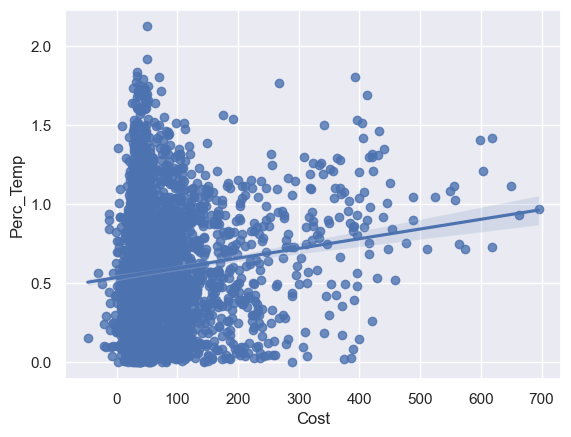

In [ ]:
sns.regplot(df, x="Cost", y="Perc_Temp")